<a href="https://colab.research.google.com/github/mazimum86/ANN/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import tensorflow
import tensorflow as tf

In [2]:
#load in the data
data = tf.keras.datasets.mnist

In [3]:
(X_train,y_train), (X_test, y_test) = data.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
#Scale the data
X_train = X_train/255.
X_test = X_test/255.

In [5]:
# Check the shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [8]:
# fit the model
history = model.fit(X_train,y_train,validation_data= (X_test,y_test), epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8461 - loss: 0.5221 - val_accuracy: 0.9576 - val_loss: 0.1493
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9500 - loss: 0.1709 - val_accuracy: 0.9669 - val_loss: 0.1118
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1324 - val_accuracy: 0.9716 - val_loss: 0.0909
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1095 - val_accuracy: 0.9739 - val_loss: 0.0851
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9714 - loss: 0.0905 - val_accuracy: 0.9772 - val_loss: 0.0791
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9732 - loss: 0.0856 - val_accuracy: 0.9788 - val_loss: 0.0692
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9770 - loss: 0.0729 - val_accuracy: 0.9787 - val_loss: 0.0703
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0658 

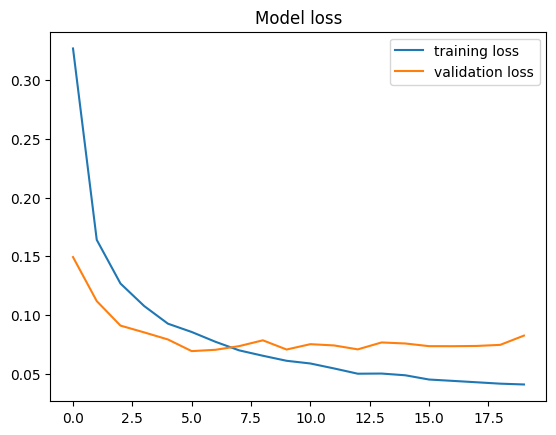

In [12]:
# Plot the loss per interation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label ='validation loss')
plt.title("Model loss")
plt.legend()
plt.show()

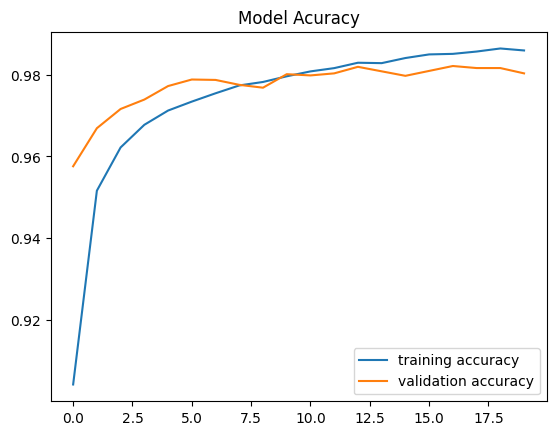

In [13]:
# Plot the accuracy per interation
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label ='validation accuracy')
plt.title("Model Acuracy")
plt.legend()
plt.show()

In [14]:
# Evaluate Model
print(model.evaluate(X_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9761 - loss: 0.1028
[0.08237995207309723, 0.9803000092506409]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(50.722222222222214, 0.5, 'Truth')

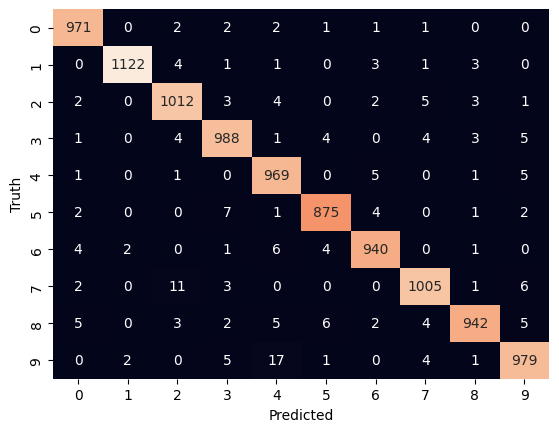

In [26]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
con = confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cbar=False,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

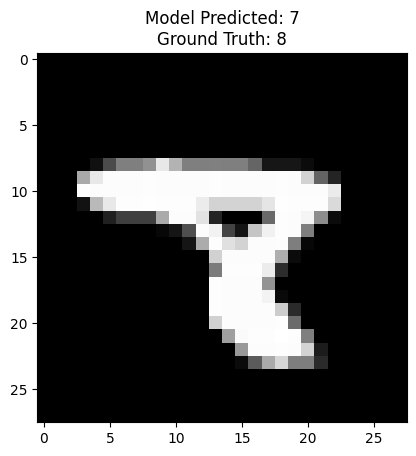

In [54]:
# show some misclassified examples
index = np.random.choice(np.where(y_pred !=y_test)[0])
plt.imshow(X_test[index],cmap='gray')
plt.title(f'Model Predicted: {y_pred[index]}\nGround Truth: {y_test[index]}');